In [6]:
from sklearn.datasets import make_blobs

centers = [[-6, -6], [-5, 5], [5, -5], [6, 6]]
X, y_true = make_blobs(n_samples= 300, n_features = 2, centers = centers,  cluster_std = 1.5)

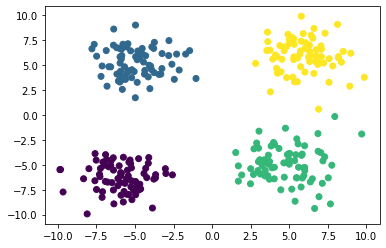

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c = y_true)
plt.show()

In [8]:
import numpy as np

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def isCluster(center_index, points, epsilon, minPoints, center_indices):
    counter = 0
    not_center_yet = []
    n = points.shape[0]
    another_center = []

    for i in range(n):
        if distance(points[center_index], points[i]) <= epsilon:
            counter += 1
            if i in center_indices:
                another_center.append(i)
            elif i != center_index :
                not_center_yet.append(i)
                
    if counter >= minPoints:
        return True, not_center_yet, another_center
    else:
        return False, None, None
    

class DBSCAN_custom:
    def __init__(self, minPoints = 6, epsilon = 2):
        self.minPoints = minPoints
        self.epsilon = epsilon
    
    def fit(self, points):
        n = points.shape[0]
        labels = np.zeros((n,))
        label = 0
        indices = np.arange(n)
        center_indices = []
        start_index = np.random.choice(indices)
        iter = 0
        chance = 2

        while 0 in labels:
            iter += 1
            iscluster = isCluster(start_index, points, self.epsilon, self.minPoints, center_indices)
            
            not_center_yet = []
            another_center =[]
            another_center_indices = []
            
            if iscluster[0]:
                not_center_yet = iscluster[1]
                another_center = iscluster[2]
                all_clusters = not_center_yet + another_center + [start_index]
                center_indices.append(start_index)
                indices = np.setdiff1d(indices, start_index)

                if len(another_center) > 0:
                    for i in all_clusters:
                        labels[i] = labels[another_center[0]]
                    if len(another_center) > 1:
                        another_center_labels = [labels[i] for i in another_center]
                        another_center_indices = [i for i, x in enumerate(labels) if x in another_center_labels]
                        for j in another_center_indices:
                            labels[j] = labels[another_center[0]]
                        
                else:
                    label += 1
                    for i in all_clusters:
                        labels[i] = label


                if len(not_center_yet) > 0:
                    start_index = np.random.choice(not_center_yet)
                else:
                    start_index = np.random.choice(indices)

            else:
                labels[start_index] = -1
                indices = np.setdiff1d(indices, start_index)
                if len(indices) == 0:
                    if chance > 0:
                        indices = np.arange(n)
                        chance -= 1
                    else:
                        break
                start_index = np.random.choice(indices)
                
            if iter > 20000:
                print("BOOM")
                break
        return labels


In [9]:
dbscan = DBSCAN_custom(minPoints=5, epsilon= 1)

y_dbscan = dbscan.fit(X)

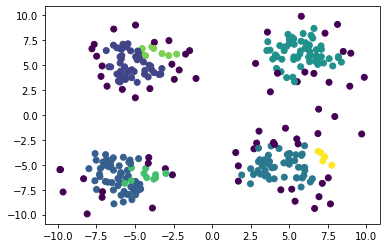

In [10]:
plt.scatter(X[:,0], X[:,1], c = y_dbscan)
plt.show()

In [11]:
from collections import Counter

print(Counter(y_dbscan))
len(Counter(y_dbscan))

Counter({-1.0: 69, 4.0: 59, 2.0: 53, 1.0: 48, 3.0: 48, 6.0: 10, 7.0: 8, 9.0: 5})


8

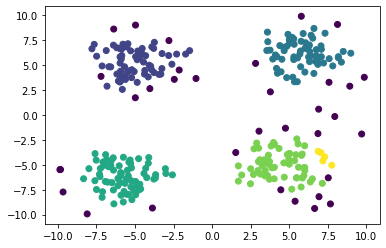

In [12]:
from sklearn.cluster import DBSCAN

dbscan2 = DBSCAN(eps=1, min_samples=5)
predict = dbscan2.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c = predict)
plt.show()
